# Steps

# 1. Preprocess & Visual Representation of data & Feature Selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dataset=pd.read_csv("C:/Users/ACER/Desktop/Intern/Day-4/Data/placement2.csv")


In [22]:
dataset

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [23]:
dataset=dataset.loc[:,'cgpa':'placed']

In [24]:
dataset.head(10)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
5,7.30,23.0,1
6,6.69,11.0,0
7,7.12,39.0,1
8,6.45,38.0,0
9,7.75,94.0,1


In [25]:
dataset.tail(10)

,cgpa,placement_exam_marks,placed
990,6.17,33.0,1
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


In [26]:
np.ndim(dataset)

2

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [28]:
dataset.shape

(1000, 3)

In [29]:
dataset.duplicated

<bound method DataFrame.duplicated of      cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]>

In [30]:
plt.scatter(dataset.cgpa,dataset.placement_exam_marks,c=dataset.plac)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('CGPA n IQ Scatter Plot')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'iq'

# 2. Extract input and output cols

In [58]:
x=dataset[['cgpa','iq']]
y=dataset['placement']

# 3. Scaling the data

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)


# 4. Split the data into train and test

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [85]:
print(f'''
x_train{x_train.shape}
y_train{y_train.shape}
x_test{x_test.shape}
y_test{y_test.shape}



''')


x_train(80, 2)
y_train(80,)
x_test(20, 2)
y_test(20,)






In [86]:
x_train

array([[ 0.71095807,  0.43830542],
       [ 0.0079093 , -0.54297537],
       [ 1.23824465,  0.21185601],
       [ 0.0957904 ,  0.21185601],
       [ 0.0079093 , -1.44877303],
       [ 0.53519588,  0.36282228],
       [-0.25573399,  0.48862751],
       [ 0.18367149, -0.26620387],
       [ 0.44731478, -2.17844336],
       [-0.95878277,  0.79056007],
       [ 0.79883917,  0.38798333],
       [-0.95878277,  1.82216295],
       [ 1.15036356, -0.94555211],
       [-1.74971264, -1.22232362],
       [-1.04666386,  0.43830542],
       [ 0.0079093 ,  0.01056764],
       [-1.74971264, -0.59329747],
       [ 0.0957904 , -1.47393408],
       [ 0.27155259,  0.11121182],
       [ 0.62307698,  0.76539902],
       [-0.0799718 , -0.44233119],
       [ 1.15036356,  0.33766124],
       [ 1.41400685, -0.87006897],
       [-0.51937728, -0.24104282],
       [-0.16785289,  0.46346647],
       [-0.78302057,  1.31894203],
       [-2.36488031,  1.49506935],
       [-0.95878277,  0.2621781 ],
       [ 0.44731478,

# 5. Model Training

In [87]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()
logistic.fit(x_train,y_train)

model_pred=logistic.predict(x_test)

# 6. Evaluation of Model And Model Selection

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model_pred)


0.85

<Axes: >

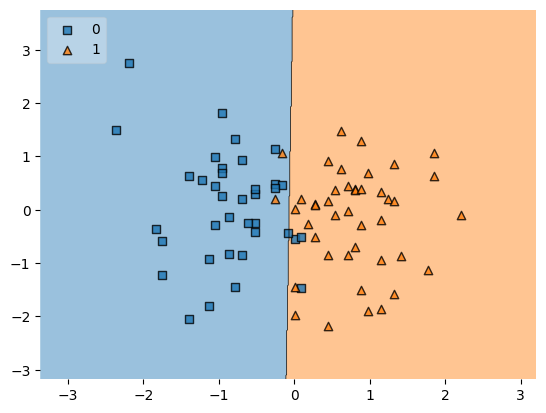

In [90]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=logistic,legend=2)


# 7. Deployment

In [93]:
from joblib import dump
dump(logistic,'model.joblib')

['model.joblib']